Импортируем бибиотеки:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

Достаем данные о номинальных зарплатах и инфляции:

In [ ]:
df = pd.read_excel('table_salary.xlsx')
years = df.columns[1:].astype(int)
salary_strointel = df[df['Вид деятельности'] == 'Строительство'].values[0][1:]
salary_hotels = df[df['Вид деятельности'] == 'Гостиницы и рестораны'].values[0][1:]
salary_doctors= df[df['Вид деятельности'] == 'Здравоохранение и предоставление социальных услуг'].values[0][1:]

df_inf = pd.read_excel('infl.xlsx')
inflation = df_inf[df_inf['инфляция'] == 'коэффициент инфляции'].values[0][1:]

Функция для пересчета номинальной зарплаты с учетом инфляции:

In [ ]:
def salary_with_inflation(list):
    salary_with_inflation=[]
    salary_with_inflation.append(list[0])
    for i in range(1,len(list)):
        if inflation[i]==0:
            salary_with_inflation.append(list[i-1])
        else:
            salary_with_inflation.append(list[i]*(1+inflation[i]/100))
    return salary_with_inflation

salary_with_inflation_strointel=salary_with_inflation(salary_strointel)
salary_with_inflation_hotels=salary_with_inflation(salary_hotels)
salary_with_inflation_doctor=salary_with_inflation(salary_doctors)

Строими графики изменения номинальной ЗП:

Text(0.5, 1.0, 'Графики изменения номинальной ЗП')

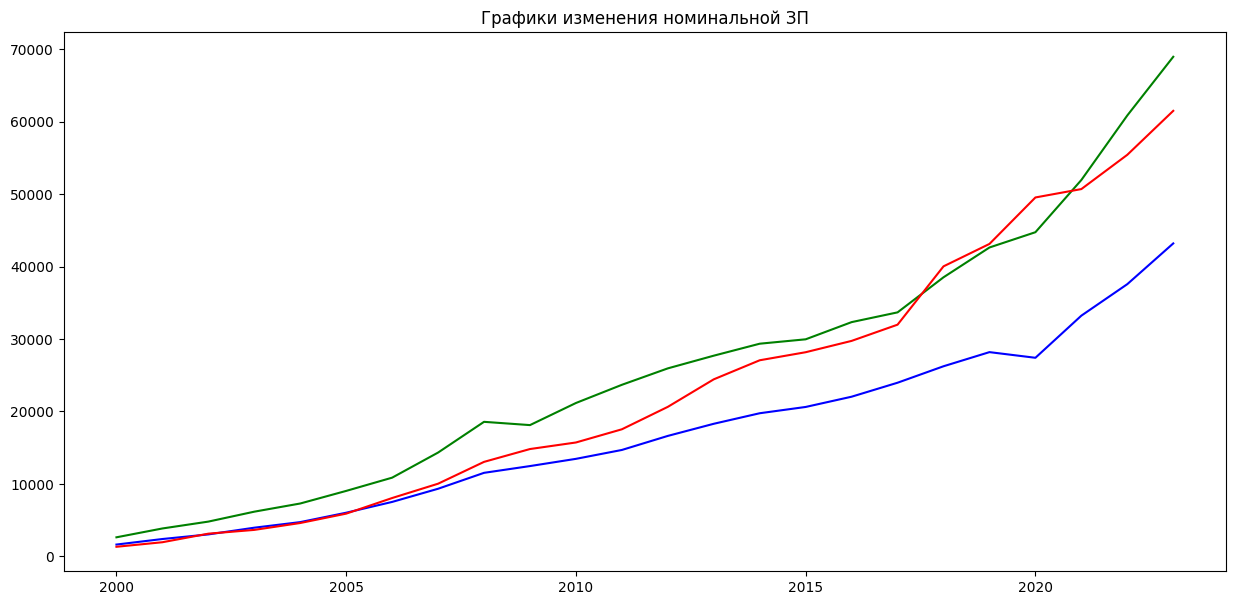

In [ ]:

plt.figure(figsize=(15, 7))
plt.plot(years, salary_strointel, '-', color='green',label='Зарплата строителя')
plt.plot(years, salary_hotels, '-', color='blue',label="Зарплата работников гостиничного дела")
plt.plot(years, salary_doctors, '-', color='red',label='Зарплата врача')

plt.title('Графики изменения номинальной ЗП')

Строим графики изменения реальной ЗП:

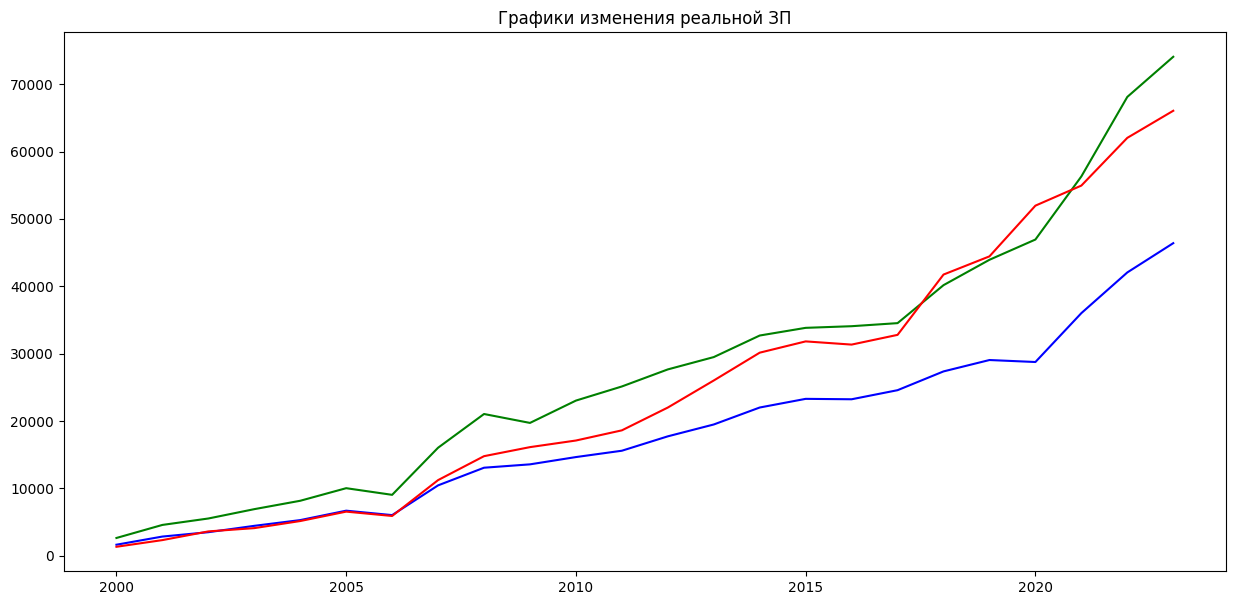

In [ ]:

plt.figure(figsize=(15, 7))
plt.plot(years, salary_with_inflation_strointel, '-',color='green',label='Зарплата строителя')
plt.plot(years, salary_with_inflation_hotels, '-',color='blue',label="Зарплата работников гостиничного дела")
plt.plot(years, salary_with_inflation_doctor, '-', color='red', label='Зарплата врача')

plt.title('Графики изменения реальной ЗП')
plt.show()